## Introduction

Special thanks to this kernel: 
    <br> https://www.kaggle.com/alfredmaboa/advanced-regression-techniques-regularization/data

      
Also learneda lot and used those kernels: 
<br>
Source1 : https://www.kaggle.com/pmarcelino/comprehensive-data-exploration-with-python
<br>
Source2 : https://www.kaggle.com/bsivavenu/house-price-calculation-methods-for-beginners
<br> 
Source3 : https://www.kaggle.com/serigne/stacked-regressions-top-4-on-leaderboard
<br>
Model source1 : https://www.kaggle.com/niteshx2/top-50-beginners-stacking-lgb-xgb


### Table of interest:
> ### 1. Importing libraries
> ### 2. Importing and inquiring data
> > #### 2.1 Importing data
> > #### 2.2 Quiring data
> ### 3. The predicted variable - Sales price Skew & kurtosis analysis
> > #### 3.1 Observing histogram
> > #### 3.2 Tansforming log or box cox: 
> ### 4. Missing data
> > #### 4.1 Presenting and locating missing data
> > #### 4.2 Replacing the missing data
> > Examples: Replacing NaN with "No", "0" most common value and such
> ### 5. Numerical and Categorial features
> > #### 5.1 Splitting the data into categorial and numerical features
> > #### 5.2 Box cox transform for skewd numerical data
>  ### 6. Adding Features
> > #### 6.1 Creating features from the data
> > Adding features at this section to be able to view them at the visualization section next 
> > #### 6.2 Deleting features
> > Features that cant be skewd or unsignificant.
> ### 7.Plotting the data
> > #### 7.1 Visually comparing data to sale prices
> > Boxplot for categorial features and 2D plot for numerical
> > #### 7.2 Comparing data to sale price through correlation matrix
> > #### 7.3 Pairplot for the most intresting parameters
> ### 8. Preparing the data 
> ### 9. Creating the model
> > #### 9.1 Importing learning libraries
> > #### 9.2 Defining folds and score functions
> > #### 9.3 Defining models
> > #### 9.4 Training the models
> > #### 9.5 Validating each model
> > #### 9.6 Blend model prediction
> ### 10 Submission


## 1. Importing libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
import os
%matplotlib inline

## 2. Import And quiring data

### 2.1 Importing data
Importing, dropping ID and some outliers based on future EDA

In [2]:
# Read files
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')


In [3]:
len(train.columns)

81

In [4]:
#Save the 'Id' column
train_ID = train['Id']
test_ID = test['Id']

In [5]:
#Now drop the  'Id' colum since it's unnecessary for  the prediction process.
train.drop("Id", axis = 1, inplace = True)
test.drop("Id", axis = 1, inplace = True)

# From EDA obvious outliers
train = train[train.GrLivArea < 4500]
train.reset_index(drop=True, inplace=True)

outliers = [30, 88, 462, 631, 1322]
train = train.drop(train.index[outliers])


print (train.columns)
print(test.columns)
print(train.shape,test.shape)


Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

### 2.2 Quiring the data
Just watching what's out there

In [6]:
train.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1453.000000,1194.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1445.000000,1453.000000,1453.000000,...,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000
mean,56.964900,69.775544,10463.490021,6.096352,5.580867,1971.268410,1984.863730,102.668512,439.390915,46.559532,...,94.275981,46.333792,21.671714,3.426015,15.133517,2.441844,43.698555,6.320716,2007.814178,181268.625602
std,42.367239,23.216208,9875.640434,1.373828,1.110229,30.165103,20.641119,179.465770,433.127562,161.530955,...,125.442057,65.391095,60.767737,29.386956,55.881824,38.275411,497.308264,2.695848,1.329841,79397.417435
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7535.000000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,130000.000000
50%,50.000000,69.000000,9477.000000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.000000,0.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163500.000000
75%,70.000000,80.000000,11600.000000,7.000000,6.000000,2000.000000,2004.000000,164.000000,712.000000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,2188.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [7]:
train.head(7)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000


## 3. The predicted variable - Sales price Skew & kurtosis analysis
The predicted variable is probably the most important variable, therefore it should be inspected throughly. 
<br> It turns out models work better with symmetric gaussian distributions, therefore we want to get rid of the skewness by using log transformation. More on log transformation later
<br> <br> Skew: 
\begin{equation} 
skew \left( X  \right) = E[ \frac{X-\mu}{\sigma} ]^3
\end{equation} https://en.wikipedia.org/wiki/Skewness
![](https://www.managedfuturesinvesting.com/images/default-source/default-album/measure-of-skewness.jpg?sfvrsn=0)
 
<br> Kurtosis: $$kurtosis(X) = E[ (\frac{X-\mu}{\sigma})^4  ]$$
https://en.wikipedia.org/wiki/Kurtosis
![](https://siemensplm.i.lithium.com/t5/image/serverpage/image-id/38460iB0F0D63C4F9B568A/image-size/large?v=1.0&px=999)

### 3.1 Observing Sale price histogram


Skewness: 1.890792
Kurtosis: 6.557511


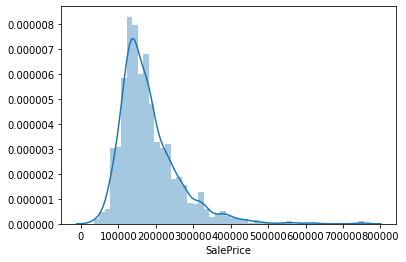

In [8]:
train['SalePrice'].describe()
sns.distplot(train['SalePrice']);
#skewness and kurtosis
print("Skewness: %f" % train['SalePrice'].skew())
print("Kurtosis: %f" % train['SalePrice'].kurt())

### 3.2 Tansforming: \begin{equation*} Y = log(1 + X)) \end{equation*}
Should correct for skew.
<br> A random example of a different log transformation
![](http://www.biostathandbook.com/pix/transformfig1.gif)


 mu = 181268.63 and sigma = 79370.09


 mu = 12.03 and sigma = 0.40



Text(0.5, 0.98, 'After transformation')

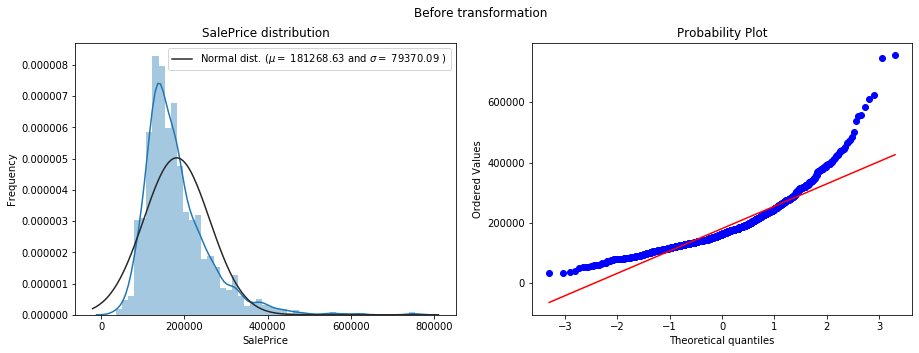

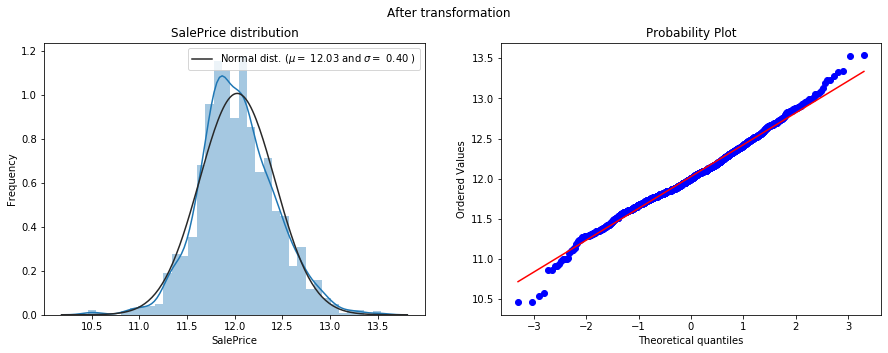

In [9]:
from scipy import stats
from scipy.stats import norm, skew #for some statistics

# Plot histogram and probability
fig = plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.distplot(train['SalePrice'] , fit=norm);
(mu, sigma) = norm.fit(train['SalePrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')
plt.subplot(1,2,2)
res = stats.probplot(train['SalePrice'], plot=plt)
plt.suptitle('Before transformation')

# Apply transformation
train.SalePrice = np.log1p(train.SalePrice )
# New prediction
y_train = train.SalePrice.values
y_train_orig = train.SalePrice


# Plot histogram and probability after transformation
fig = plt.figure(figsize=(15,5))
plt.subplot(1,2,1)

sns.distplot(train['SalePrice'] , fit=norm);
(mu, sigma) = norm.fit(train['SalePrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

plt.subplot(1,2,2)
res = stats.probplot(train['SalePrice'], plot=plt)
plt.suptitle('After transformation')

Concatenate train and test

In [10]:
# y_train_orig = train.SalePrice
# train.drop("SalePrice", axis = 1, inplace = True)
data_features = pd.concat((train, test)).reset_index(drop=True)
print(data_features.shape)

# print(train.SalePrice)

(2912, 80)


## 4. Missing data

### 4.1 Locating missing data


In [11]:
# Missing data in train
data_features_na = data_features.isnull().sum()
data_features_na = data_features_na[data_features_na>0]
data_features_na.sort_values(ascending=False)

PoolQC          2903
MiscFeature     2807
Alley           2715
Fence           2344
SalePrice       1459
FireplaceQu     1418
LotFrontage      486
GarageQual       158
GarageCond       158
GarageFinish     158
GarageYrBlt      158
GarageType       156
BsmtExposure      82
BsmtCond          82
BsmtQual          81
BsmtFinType2      80
BsmtFinType1      79
MasVnrType        24
MasVnrArea        23
MSZoning           4
BsmtFullBath       2
BsmtHalfBath       2
Utilities          2
Functional         2
Electrical         1
BsmtUnfSF          1
Exterior1st        1
Exterior2nd        1
TotalBsmtSF        1
GarageCars         1
BsmtFinSF2         1
BsmtFinSF1         1
KitchenQual        1
SaleType           1
GarageArea         1
dtype: int64

In [12]:
#missing data percent plot
total = data_features.isnull().sum().sort_values(ascending=False)
percent = (data_features.isnull().sum()/data_features.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
PoolQC,2903,0.996909
MiscFeature,2807,0.963942
Alley,2715,0.932349
Fence,2344,0.804945
SalePrice,1459,0.501030
FireplaceQu,1418,0.486951
LotFrontage,486,0.166896
GarageQual,158,0.054258
GarageYrBlt,158,0.054258
GarageFinish,158,0.054258


### 4.2 Replacing the missing data

Correcting for the format, mostly filling NaN with "No" or "0"

#### String Values
For numbers that have no significance and should actually be strings

In [13]:
str_vars = ['MSSubClass','YrSold','MoSold']
for var in str_vars:
    data_features[var] = data_features[var].apply(str)


Most common (frequent) string transform

In [14]:
# Both Exterior 1 & 2 have only one missing value. We will just substitute in the most common string

common_vars = ['Exterior1st','Exterior2nd','SaleType','Electrical','KitchenQual']
for var in common_vars:
    data_features[var] = data_features[var].fillna(data_features[var].mode()[0])
    
# 'RL' is by far the most common value. So we can fill in missing values with 'RL'
data_features['MSZoning'] = data_features.groupby('MSSubClass')['MSZoning'].transform(lambda x: x.fillna(x.mode()[0]))

Turn Nan to None 

In [15]:
# # data description says NA means "No Pool", majority of houses have no Pool at all in general.
# features[] = features["PoolQC"].fillna("None")
# Replacing missing data with None
for col in ['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond','BsmtQual',
            'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',"PoolQC"
           ,'Alley','Fence','MiscFeature','FireplaceQu','MasVnrType','Utilities']:
    data_features[col] = data_features[col].fillna('None')
# # For all these categorical basement-related features, NaN means that there is no basement
# for col in (:
#     features[col] = features[col].fillna('None')

Fill numerical data - 0 or median

In [16]:
# Replacing missing data with 0 (Since No garage = no cars in such garage.)
for col in ('GarageYrBlt', 'GarageArea', 'GarageCars','MasVnrArea','BsmtFinSF1','BsmtFinSF2'
           ,'BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','BsmtUnfSF','TotalBsmtSF'):
    data_features[col] = data_features[col].fillna(0)

# group by neighborhood and fill in missing value by the median LotFrontage of all the neighborhood
data_features['LotFrontage'] = data_features.groupby('Neighborhood')['LotFrontage'].transform(lambda x: x.fillna(x.median()))
print('Features size:', data_features.shape)

Features size: (2912, 80)


Uniqe

In [17]:
# data description says NA means typical
data_features['Functional'] = data_features['Functional'].fillna('Typ')


In [18]:
#missing data
total = data_features.isnull().sum().sort_values(ascending=False)
percent = (data_features.isnull().sum()/data_features.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(10)



,Total,Percent
SalePrice,1459,0.50103
Electrical,0,0.00000
ExterCond,0,0.00000
ExterQual,0,0.00000
Exterior1st,0,0.00000
Exterior2nd,0,0.00000
Fence,0,0.00000
FireplaceQu,0,0.00000
Fireplaces,0,0.00000
Foundation,0,0.00000


## 5. Numerical and Categorial features

### 5.1 Splitting the data into categorial and numerical features

In [19]:
# Differentiate numerical features (minus the target) and categorical features
categorical_features = data_features.select_dtypes(include=['object']).columns
print(categorical_features)
numerical_features = data_features.select_dtypes(exclude = ["object"]).columns
print(numerical_features)

print("Numerical features : " + str(len(numerical_features)))
print("Categorical features : " + str(len(categorical_features)))
feat_num = data_features[numerical_features]
feat_cat = data_features[categorical_features]

Index(['Alley', 'BldgType', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinType2', 'BsmtQual', 'CentralAir', 'Condition1', 'Condition2',
       'Electrical', 'ExterCond', 'ExterQual', 'Exterior1st', 'Exterior2nd',
       'Fence', 'FireplaceQu', 'Foundation', 'Functional', 'GarageCond',
       'GarageFinish', 'GarageQual', 'GarageType', 'Heating', 'HeatingQC',
       'HouseStyle', 'KitchenQual', 'LandContour', 'LandSlope', 'LotConfig',
       'LotShape', 'MSSubClass', 'MSZoning', 'MasVnrType', 'MiscFeature',
       'MoSold', 'Neighborhood', 'PavedDrive', 'PoolQC', 'RoofMatl',
       'RoofStyle', 'SaleCondition', 'SaleType', 'Street', 'Utilities',
       'YrSold'],
      dtype='object')
Index(['1stFlrSF', '2ndFlrSF', '3SsnPorch', 'BedroomAbvGr', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtFullBath', 'BsmtHalfBath', 'BsmtUnfSF',
       'EnclosedPorch', 'Fireplaces', 'FullBath', 'GarageArea', 'GarageCars',
       'GarageYrBlt', 'GrLivArea', 'HalfBath', 'KitchenAbvGr', 'LotArea',
  

In [20]:
feat_num.head(10)


,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,EnclosedPorch,...,OverallCond,OverallQual,PoolArea,SalePrice,ScreenPorch,TotRmsAbvGrd,TotalBsmtSF,WoodDeckSF,YearBuilt,YearRemodAdd
0,856,854,0,3,706.0,0.0,1.0,0.0,150.0,0,...,5,7,0,12.247699,0,8,856.0,0,2003,2003
1,1262,0,0,3,978.0,0.0,0.0,1.0,284.0,0,...,8,6,0,12.109016,0,6,1262.0,298,1976,1976
2,920,866,0,3,486.0,0.0,1.0,0.0,434.0,0,...,5,7,0,12.317171,0,6,920.0,0,2001,2002
3,961,756,0,3,216.0,0.0,1.0,0.0,540.0,272,...,5,7,0,11.849405,0,7,756.0,0,1915,1970
4,1145,1053,0,4,655.0,0.0,1.0,0.0,490.0,0,...,5,8,0,12.429220,0,9,1145.0,192,2000,2000
5,796,566,320,1,732.0,0.0,1.0,0.0,64.0,0,...,5,5,0,11.870607,0,5,796.0,40,1993,1995
6,1694,0,0,3,1369.0,0.0,1.0,0.0,317.0,0,...,5,8,0,12.634606,0,7,1686.0,255,2004,2005
7,1107,983,0,3,859.0,32.0,1.0,0.0,216.0,228,...,6,7,0,12.206078,0,7,1107.0,235,1973,1973
8,1022,752,0,2,0.0,0.0,0.0,0.0,952.0,205,...,5,7,0,11.774528,0,8,952.0,90,1931,1950
9,1077,0,0,2,851.0,0.0,1.0,0.0,140.0,0,...,6,5,0,11.678448,0,5,991.0,0,1939,1950


In [21]:
feat_cat.head(10)

,Alley,BldgType,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,BsmtQual,CentralAir,Condition1,Condition2,...,Neighborhood,PavedDrive,PoolQC,RoofMatl,RoofStyle,SaleCondition,SaleType,Street,Utilities,YrSold
0,None,1Fam,TA,No,GLQ,Unf,Gd,Y,Norm,Norm,...,CollgCr,Y,None,CompShg,Gable,Normal,WD,Pave,AllPub,2008
1,None,1Fam,TA,Gd,ALQ,Unf,Gd,Y,Feedr,Norm,...,Veenker,Y,None,CompShg,Gable,Normal,WD,Pave,AllPub,2007
2,None,1Fam,TA,Mn,GLQ,Unf,Gd,Y,Norm,Norm,...,CollgCr,Y,None,CompShg,Gable,Normal,WD,Pave,AllPub,2008
3,None,1Fam,Gd,No,ALQ,Unf,TA,Y,Norm,Norm,...,Crawfor,Y,None,CompShg,Gable,Abnorml,WD,Pave,AllPub,2006
4,None,1Fam,TA,Av,GLQ,Unf,Gd,Y,Norm,Norm,...,NoRidge,Y,None,CompShg,Gable,Normal,WD,Pave,AllPub,2008
5,None,1Fam,TA,No,GLQ,Unf,Gd,Y,Norm,Norm,...,Mitchel,Y,None,CompShg,Gable,Normal,WD,Pave,AllPub,2009
6,None,1Fam,TA,Av,GLQ,Unf,Ex,Y,Norm,Norm,...,Somerst,Y,None,CompShg,Gable,Normal,WD,Pave,AllPub,2007
7,None,1Fam,TA,Mn,ALQ,BLQ,Gd,Y,PosN,Norm,...,NWAmes,Y,None,CompShg,Gable,Normal,WD,Pave,AllPub,2009
8,None,1Fam,TA,No,Unf,Unf,TA,Y,Artery,Norm,...,OldTown,Y,None,CompShg,Gable,Abnorml,WD,Pave,AllPub,2008
9,None,2fmCon,TA,No,GLQ,Unf,TA,Y,Artery,Artery,...,BrkSide,Y,None,CompShg,Gable,Normal,WD,Pave,AllPub,2008


### 5.2 Box cox transform for skewd numerical data
Another transformation to reduce skew. 
<br> Equation:
![](https://www.statisticshowto.datasciencecentral.com/wp-content/uploads/2015/07/boxcox-formula-1.png)
<br> Transformation example:
![](https://www.itl.nist.gov/div898/handbook/eda/section3/gif/boxcox.gif)

In [22]:
# Plot skew value for each numerical value
from scipy.stats import skew 
skewness = feat_num.apply(lambda x: skew(x))
skewness.sort_values(ascending=False)

MiscVal          21.920854
PoolArea         17.673354
LotArea          13.099125
LowQualFinSF     12.391544
3SsnPorch        11.362112
KitchenAbvGr      4.296287
BsmtFinSF2        4.145924
EnclosedPorch     4.029556
ScreenPorch       3.941117
BsmtHalfBath      3.925998
MasVnrArea        2.624575
OpenPorchSF       2.527454
WoodDeckSF        1.844011
1stFlrSF          1.259015
LotFrontage       1.105058
GrLivArea         1.068478
BsmtFinSF1        0.980559
BsmtUnfSF         0.919505
2ndFlrSF          0.860245
TotRmsAbvGrd      0.747869
Fireplaces        0.726054
HalfBath          0.693943
TotalBsmtSF       0.672246
BsmtFullBath      0.619682
OverallCond       0.578748
BedroomAbvGr      0.325821
GarageArea        0.217763
OverallQual       0.191839
FullBath          0.164972
GarageCars       -0.219219
YearRemodAdd     -0.451505
YearBuilt        -0.600202
GarageYrBlt      -3.915227
SalePrice              NaN
dtype: float64

Encode categorial features: can and should be replaced.

In [23]:
skewness = skewness[abs(skewness) > 0.5]
print("There are {} skewed numerical features to Box Cox transform".format(skewness.shape[0]))
print("Mean skewnees: {}".format(np.mean(skewness)))

from scipy.special import boxcox1p
skewed_features = skewness.index
lam = 0.15
for feat in skewed_features:
    feat_num[feat] = boxcox1p(feat_num[feat], boxcox_normmax(feat_num[feat] + 1))
    data_features[feat] = boxcox1p(data_features[feat], boxcox_normmax(data_features[feat] + 1))
    
    
from scipy.stats import skew 
skewness.sort_values(ascending=False)

There are 27 skewed numerical features to Box Cox transform
Mean skewnees: 4.055477203766243


MiscVal          21.920854
PoolArea         17.673354
LotArea          13.099125
LowQualFinSF     12.391544
3SsnPorch        11.362112
KitchenAbvGr      4.296287
BsmtFinSF2        4.145924
EnclosedPorch     4.029556
ScreenPorch       3.941117
BsmtHalfBath      3.925998
MasVnrArea        2.624575
OpenPorchSF       2.527454
WoodDeckSF        1.844011
1stFlrSF          1.259015
LotFrontage       1.105058
GrLivArea         1.068478
BsmtFinSF1        0.980559
BsmtUnfSF         0.919505
2ndFlrSF          0.860245
TotRmsAbvGrd      0.747869
Fireplaces        0.726054
HalfBath          0.693943
TotalBsmtSF       0.672246
BsmtFullBath      0.619682
OverallCond       0.578748
YearBuilt        -0.600202
GarageYrBlt      -3.915227
dtype: float64

Observe the correction. 
We can see that a lot of parameters remained skewd. I suspect that's for variables that have a lot of 0. 

In [24]:
skewness = feat_num.apply(lambda x: skew(x))
skewness = skewness[abs(skewness) > 0.5]

print("There are {} skewed numerical features after Box Cox transform".format(skewness.shape[0]))
print("Mean skewnees: {}".format(np.mean(skewness)))
skewness.sort_values(ascending=False)


There are 17 skewed numerical features after Box Cox transform
Mean skewnees: 3.504842265961851


PoolArea         15.581589
3SsnPorch         8.854291
LowQualFinSF      8.598260
MiscVal           5.233200
BsmtHalfBath      3.775618
KitchenAbvGr      3.774434
ScreenPorch       3.149430
BsmtFinSF2        2.580032
EnclosedPorch     2.156781
MasVnrArea        0.977673
2ndFlrSF          0.894364
WoodDeckSF        0.784470
HalfBath          0.730155
GarageYrBlt       0.703540
OpenPorchSF       0.620616
BsmtFullBath      0.614203
Fireplaces        0.553661
dtype: float64

## 6. Adding features


### 6.1 Creating features from the data
Adding features at this section to be able to view them at the visualization section next 


In [25]:
# Calculating totals before droping less significant columns

#  Adding total sqfootage feature 
data_features['TotalSF']=data_features['TotalBsmtSF'] + data_features['1stFlrSF'] + data_features['2ndFlrSF']
#  Adding total bathrooms feature
data_features['Total_Bathrooms'] = (data_features['FullBath'] + (0.5 * data_features['HalfBath']) +
                               data_features['BsmtFullBath'] + (0.5 * data_features['BsmtHalfBath']))
#  Adding total porch sqfootage feature
data_features['Total_porch_sf'] = (data_features['OpenPorchSF'] + data_features['3SsnPorch'] +
                              data_features['EnclosedPorch'] + data_features['ScreenPorch'] +
                              data_features['WoodDeckSF'])


# data_features['Super_quality'] = OverallQual * 
# vars = ['OverallQual', 'GrLivArea', 'TotalBsmtSF', 'FullBath']


### 6.2 Deleting features
Features that cant be skewd or are unsignificant.

In [26]:
data_features['haspool'] = data_features['PoolArea'].apply(lambda x: 1 if x > 0 else 0)
data_features['hasgarage'] = data_features['GarageArea'].apply(lambda x: 1 if x > 0 else 0)
data_features['hasbsmt'] = data_features['TotalBsmtSF'].apply(lambda x: 1 if x > 0 else 0)
data_features['hasfireplace'] = data_features['Fireplaces'].apply(lambda x: 1 if x > 0 else 0)


# Not normaly distributed can not be normalised and has no central tendecy
data_features = data_features.drop(['MasVnrArea', 'OpenPorchSF', 'WoodDeckSF', 'BsmtFinSF1','2ndFlrSF'], axis=1)
# data_features = data_features.drop(['MasVnrArea', 'OpenPorchSF', 'WoodDeckSF', 'BsmtFinSF1','2ndFlrSF',
#                          'PoolArea','3SsnPorch','LowQualFinSF','MiscVal','BsmtHalfBath','ScreenPorch',
#                          'ScreenPorch','KitchenAbvGr','BsmtFinSF2','EnclosedPorch','LotFrontage'
#                          ,'BsmtUnfSF','GarageYrBlt'], axis=1)

print('data_features size:', data_features.shape)


data_features size: (2912, 82)


### 5.9 Splitting the data back to train and test


In [27]:
train = data_features.iloc[:len(y_train), :]
test = data_features.iloc[len(y_train):, :]
print(['Train data shpe: ',train.shape,'Prediction on (Sales price) shape: ', y_train.shape,'Test shape: ', test.shape])

['Train data shpe: ', (1453, 82), 'Prediction on (Sales price) shape: ', (1453,), 'Test shape: ', (1459, 82)]


## 7.Plotting the data

### 7.1 Visually comparing data to sale prices
One can observe the behaviour of the variables, locate outlier and more.

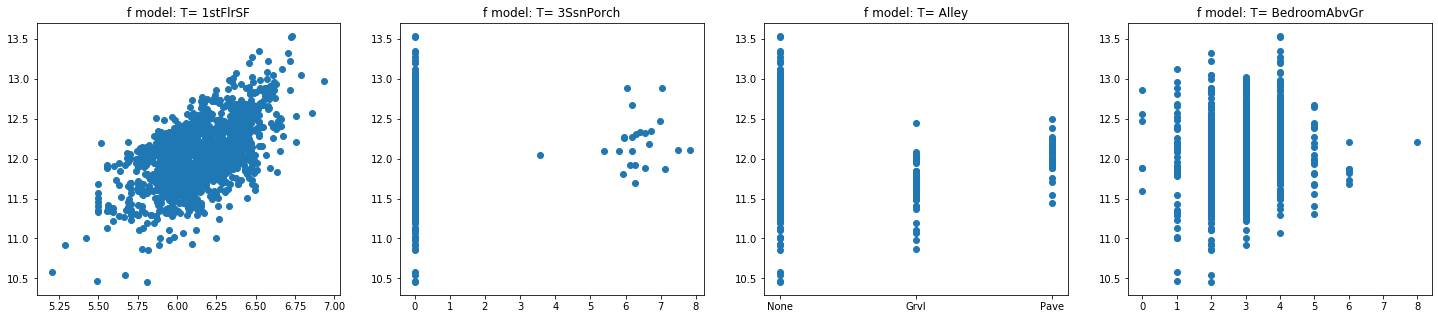

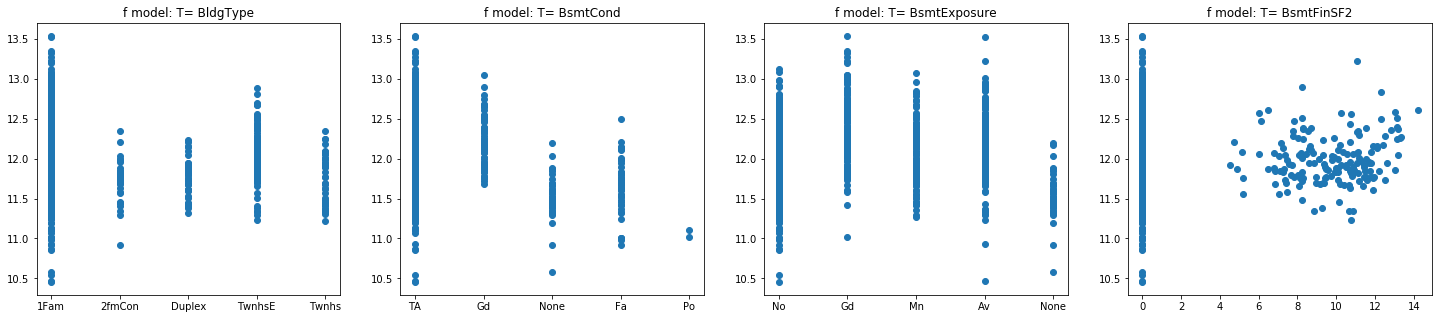

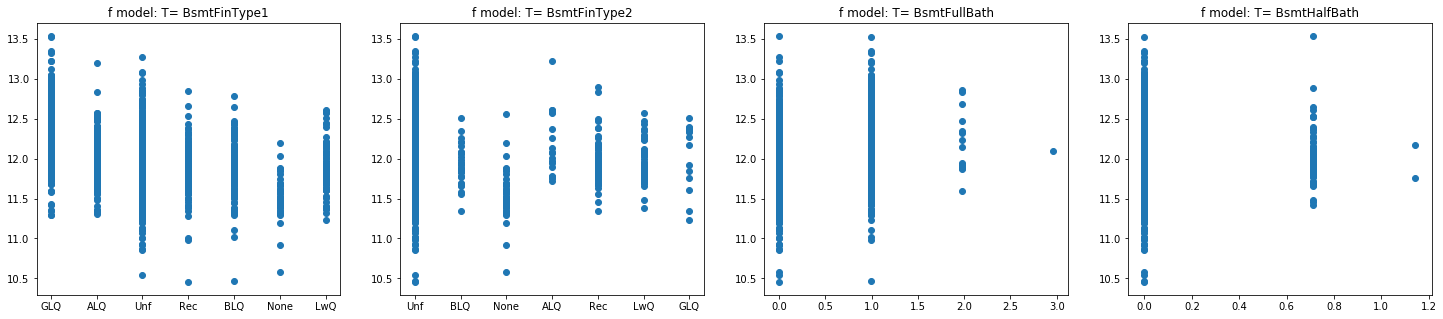

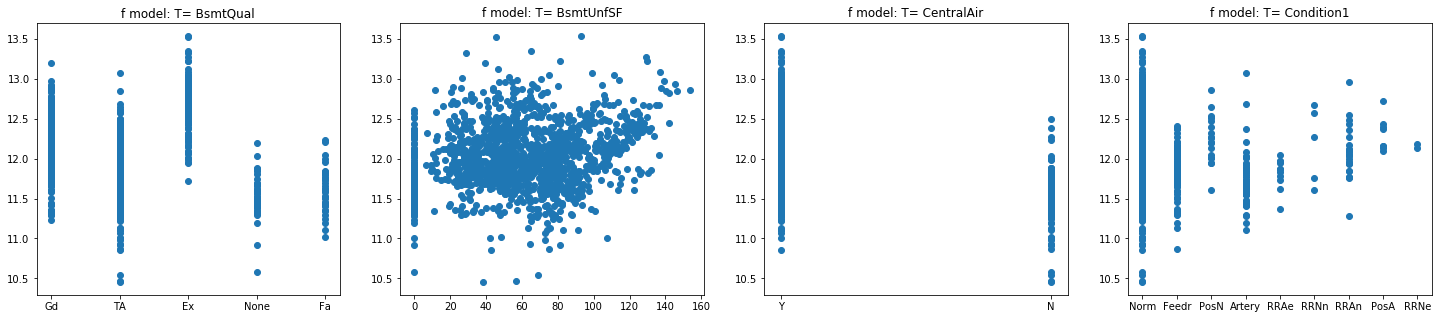

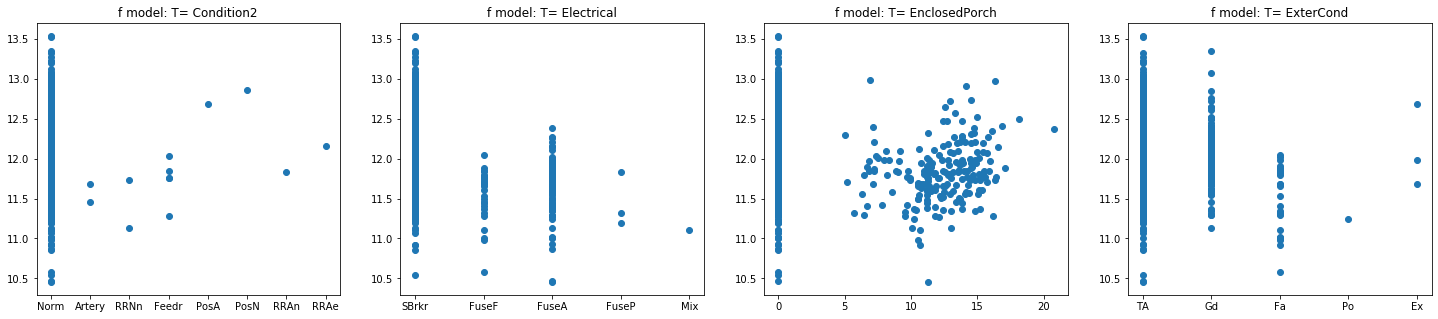

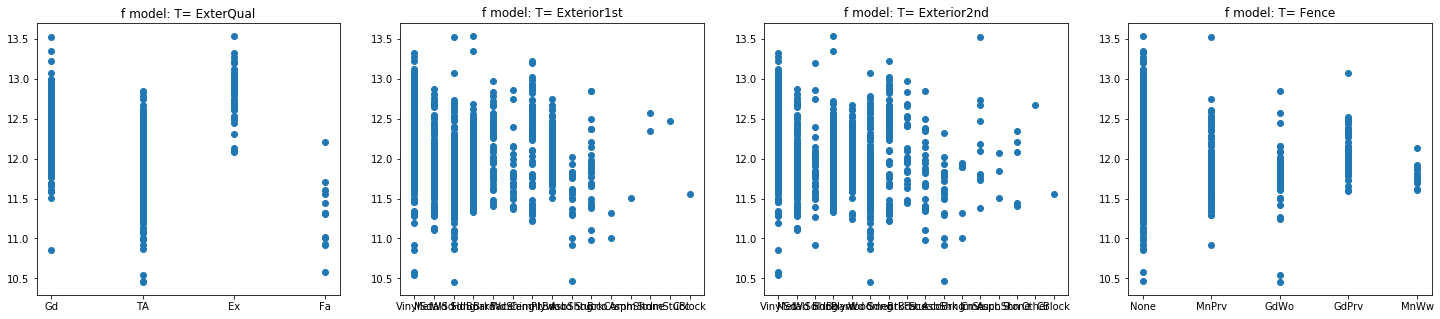

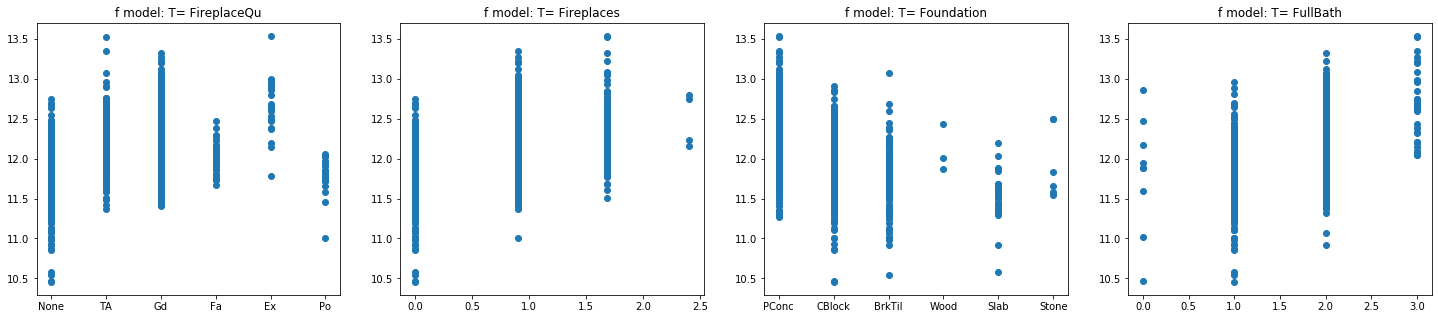

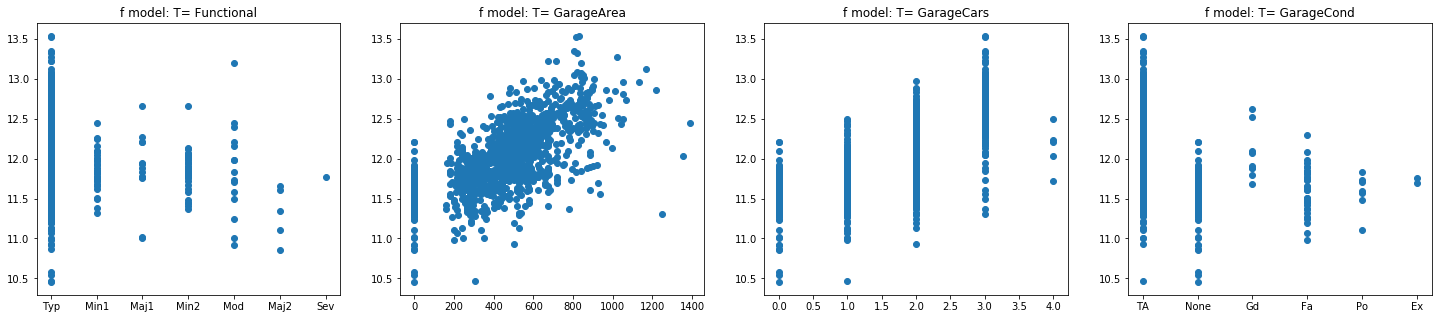

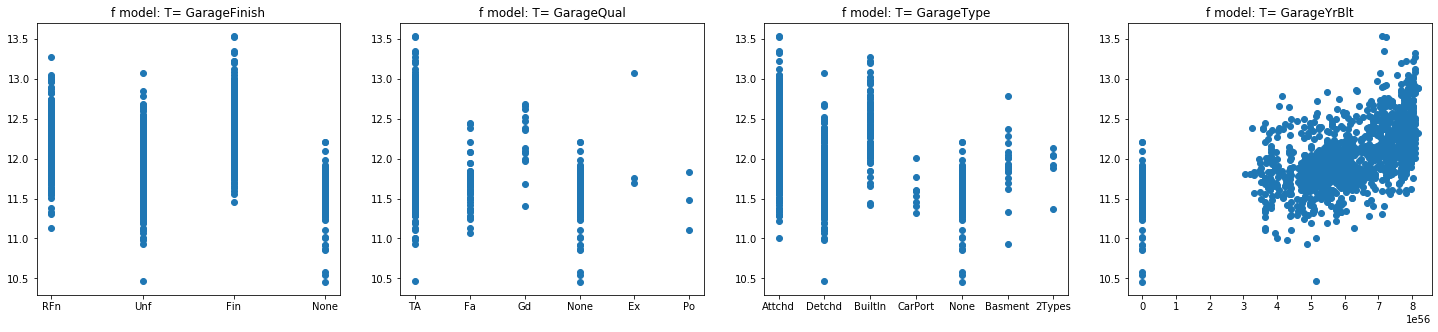

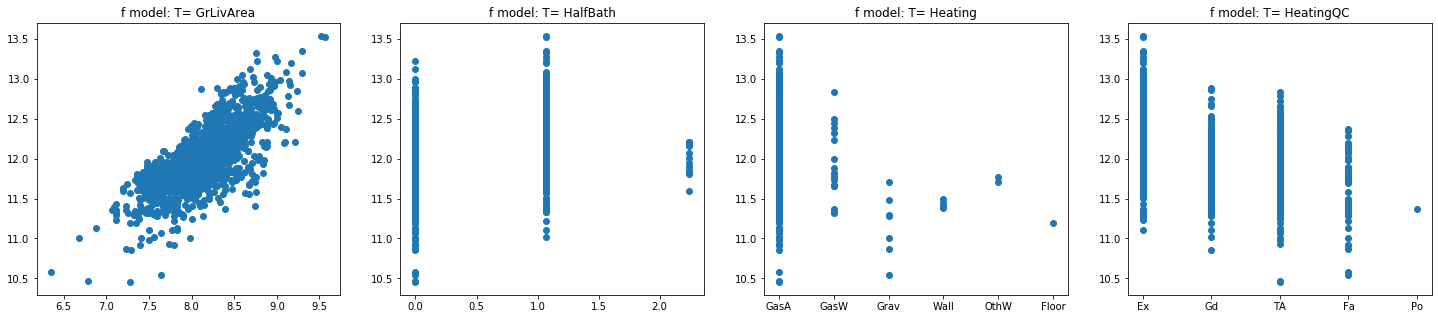

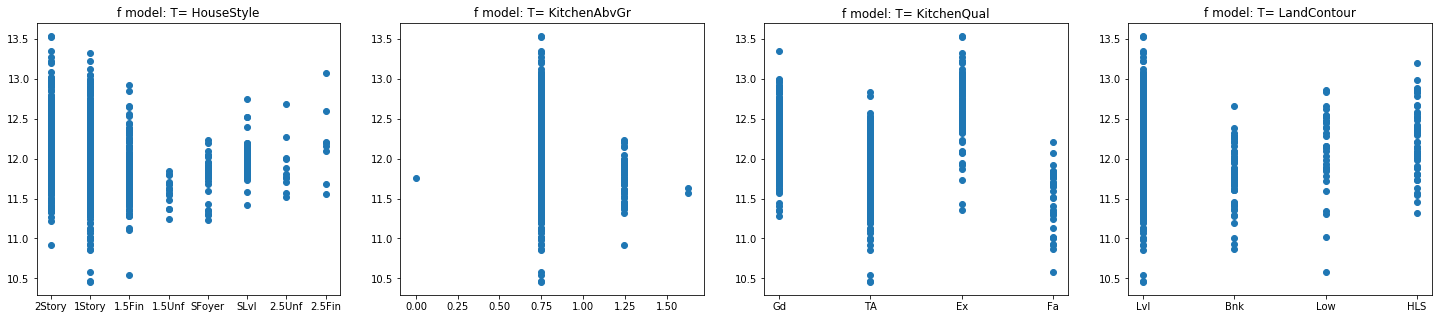

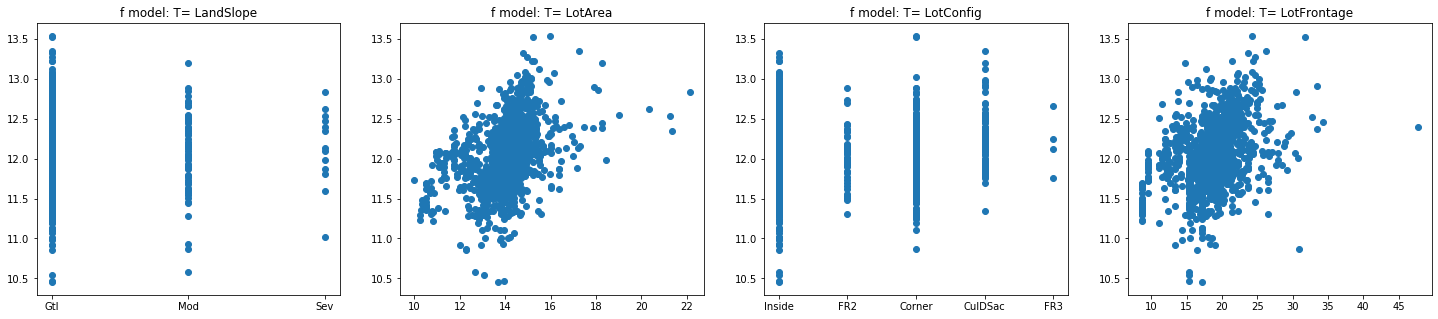

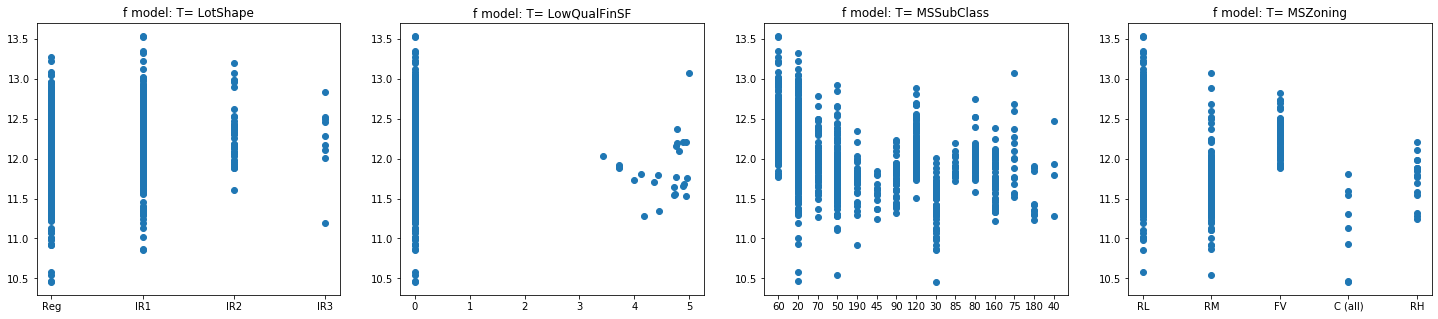

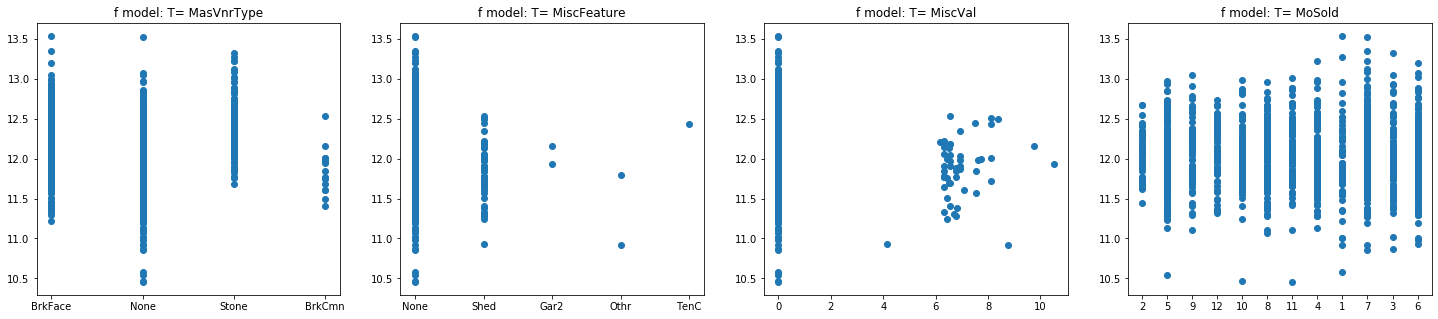

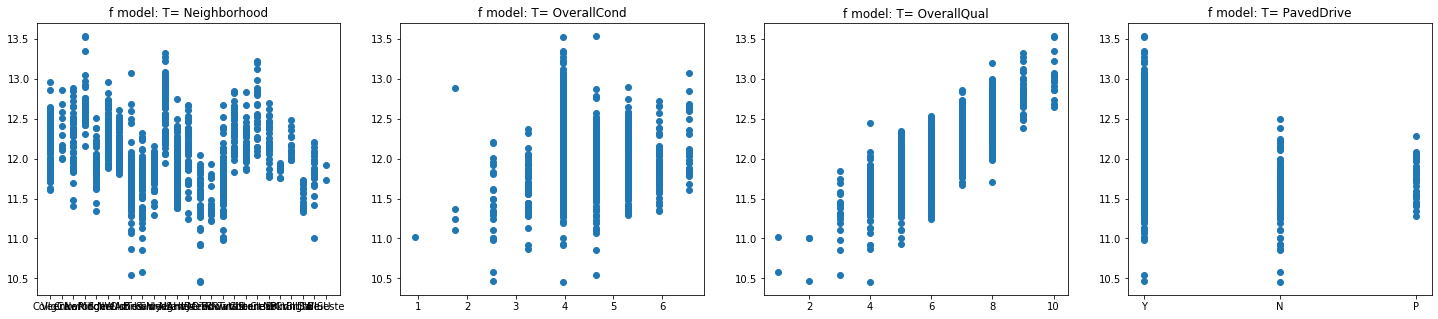

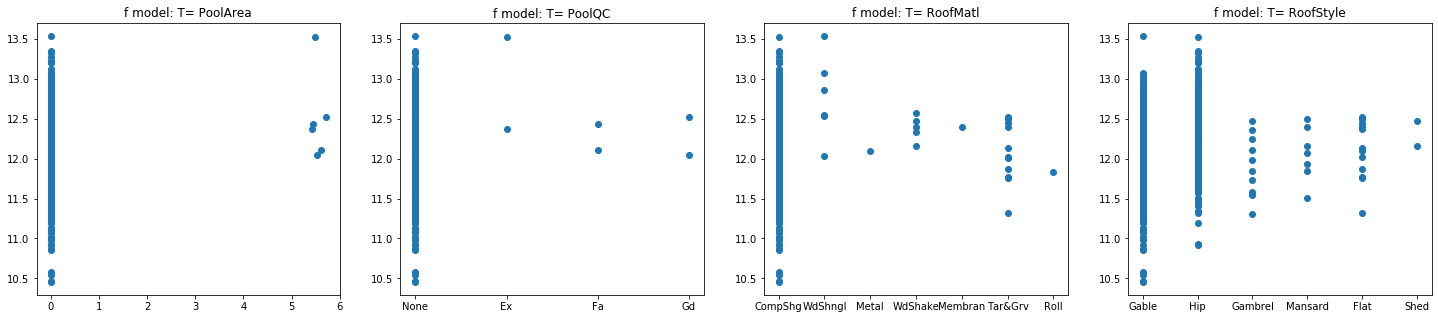

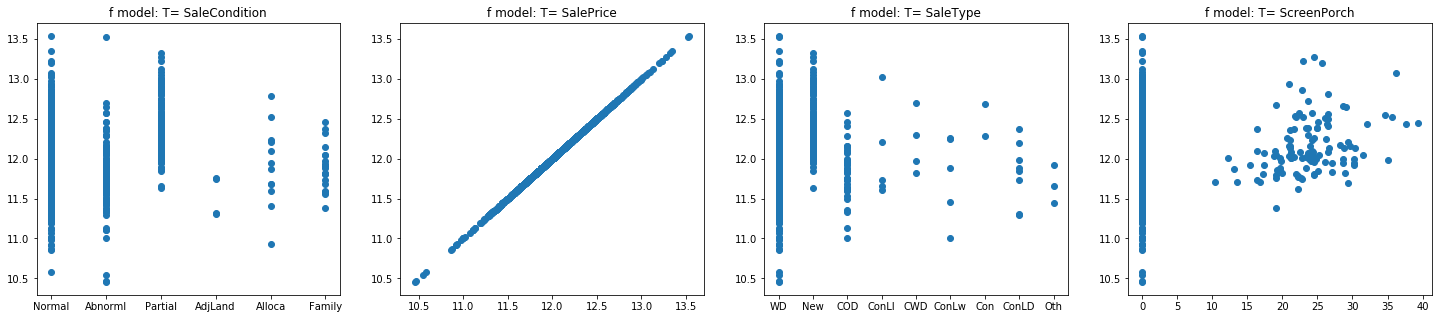

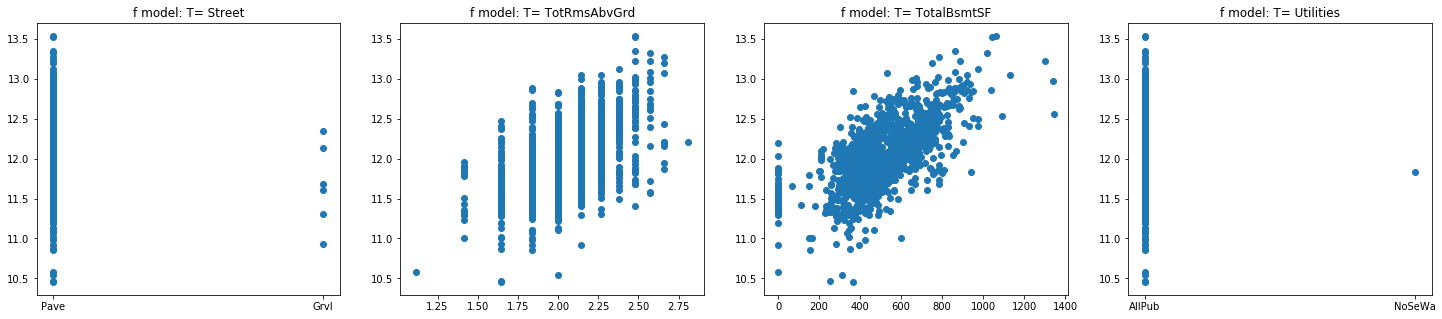

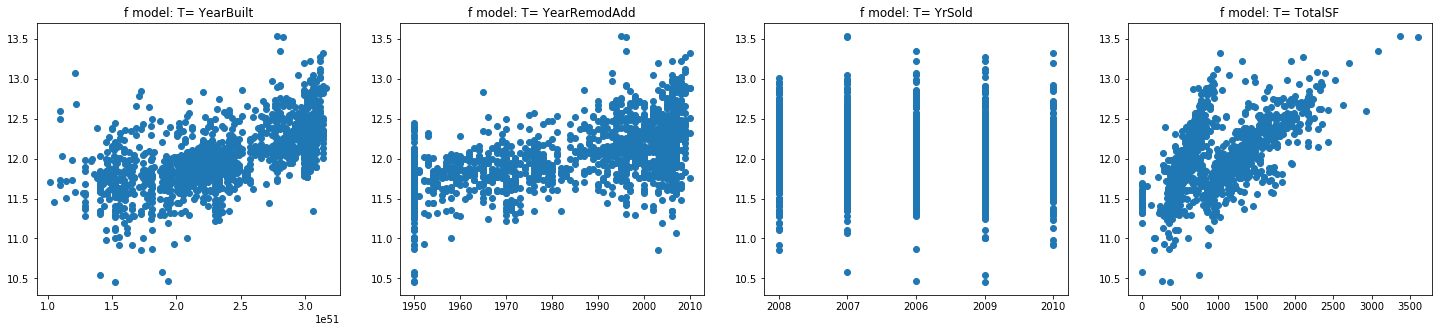

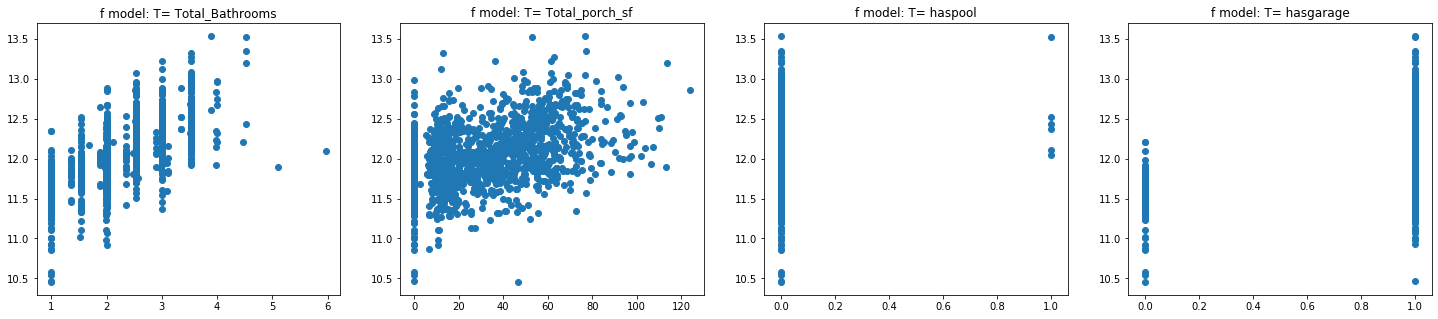

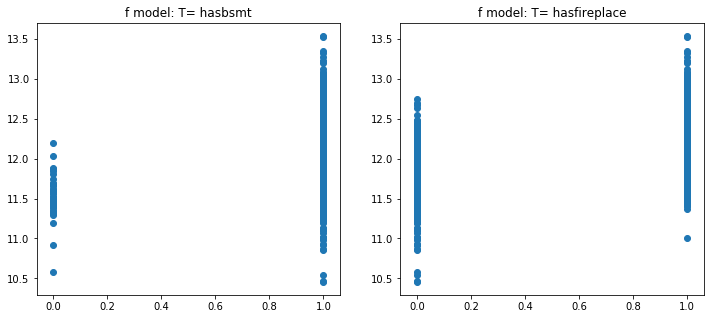

In [28]:
vars = data_features.columns
# vars = numerical_features
figures_per_time = 4
count = 0 
y = y_train
for var in vars:
    x = train[var]
#     print(y.shape,x.shape)
    plt.figure(count//figures_per_time,figsize=(25,5))
    plt.subplot(1,figures_per_time,np.mod(count,4)+1)
    plt.scatter(x, y);
    plt.title('f model: T= {}'.format(var))
    count+=1
    


remove outliers

In [29]:
# Removes outliers 
# outliers = [30, 88, 462, 631, 1322]
# train = train.drop(train.index[outliers])
y_train = train['SalePrice']

### Optional: Box plot

Box plot is heavy, one can manualy choose the intresting parameters

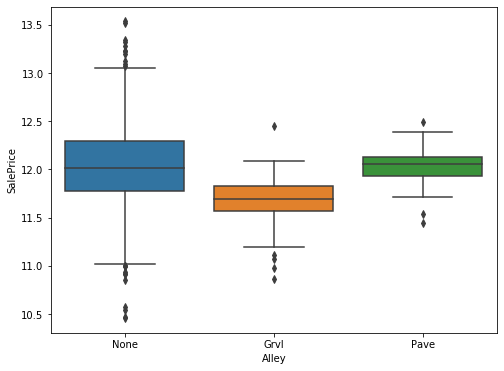

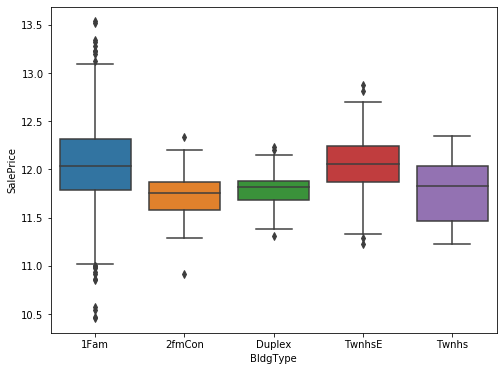

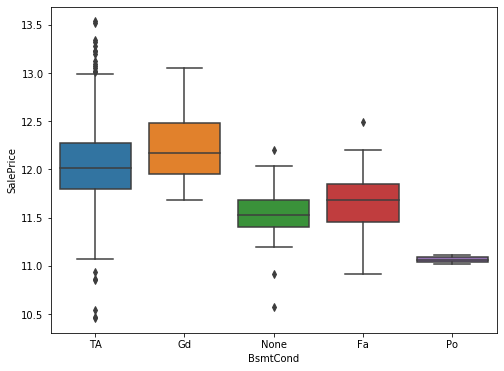

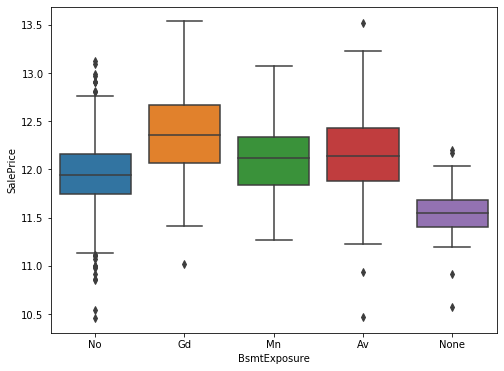

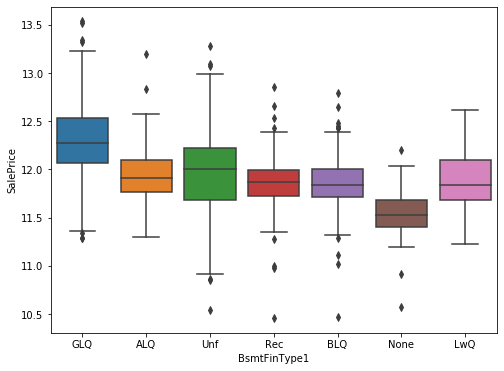

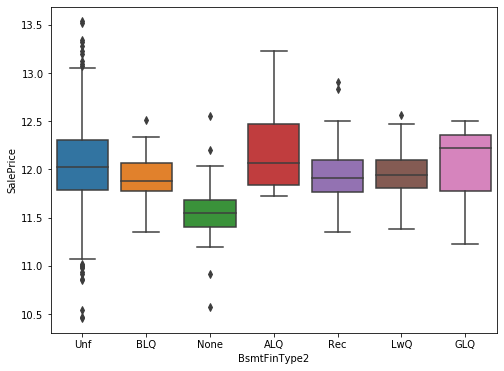

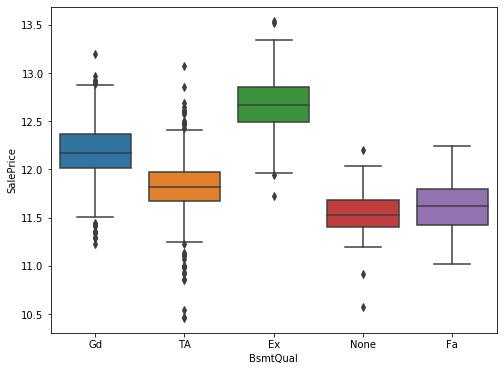

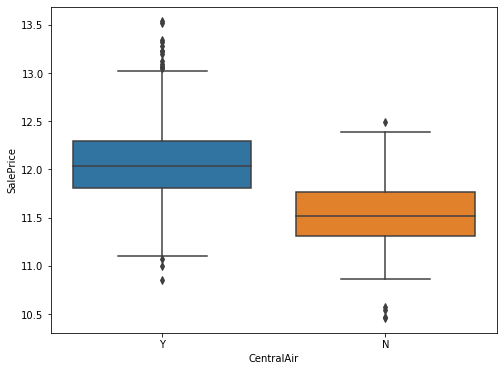

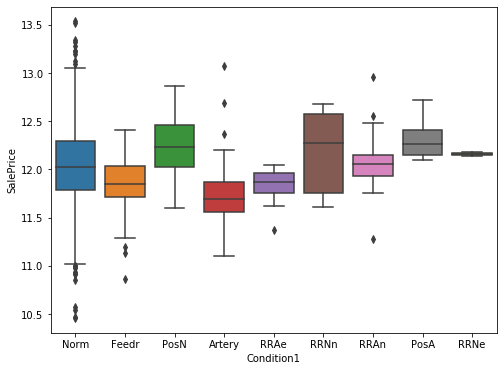

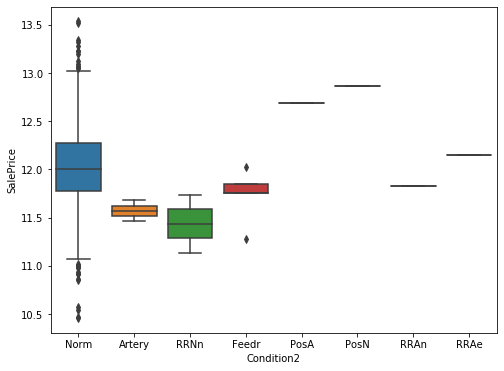

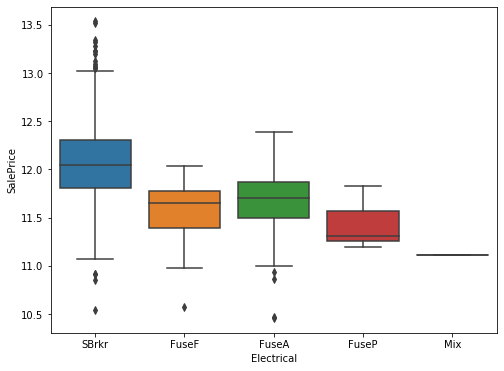

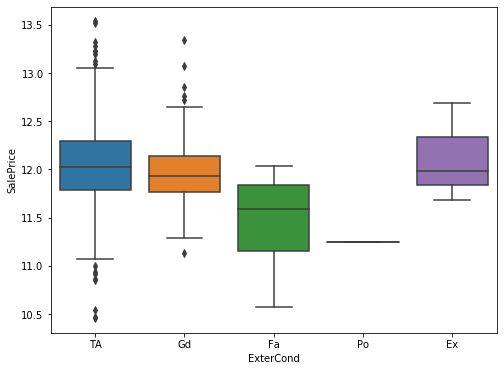

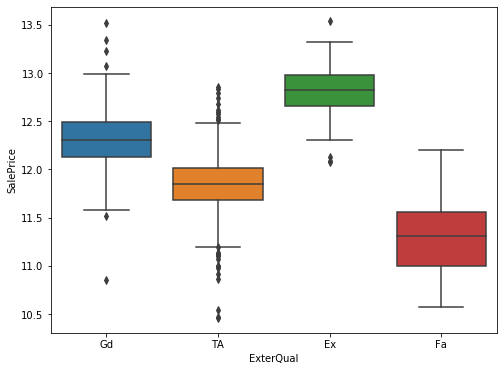

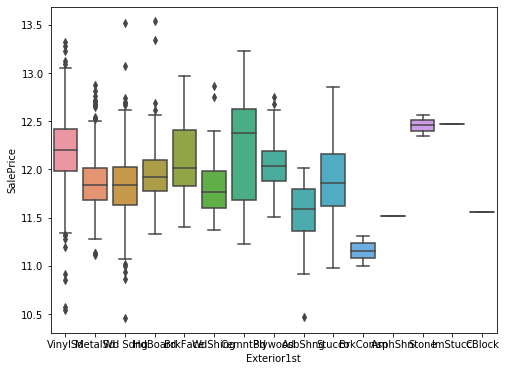

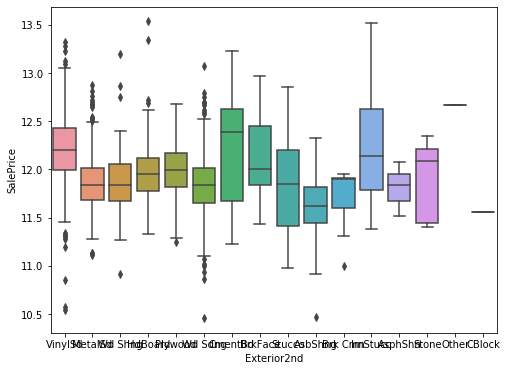

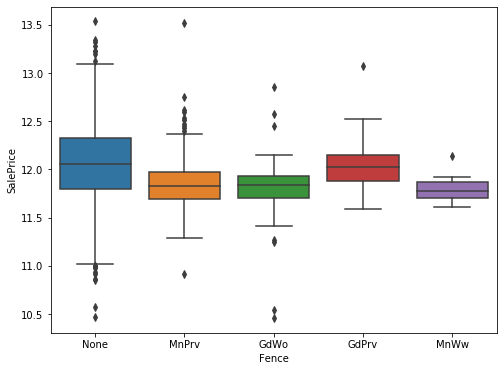

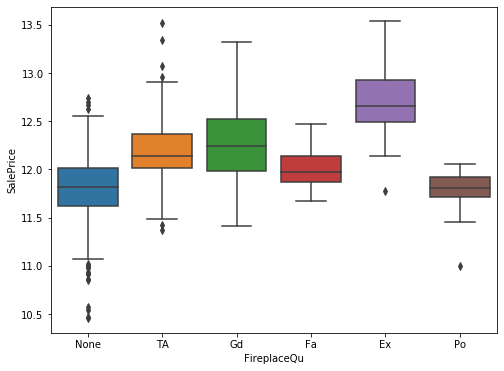

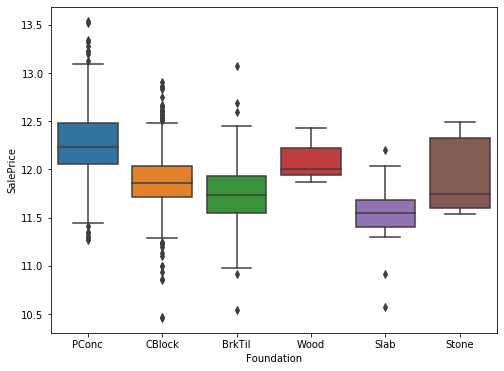

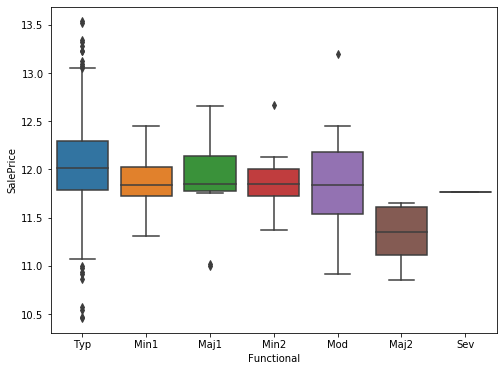

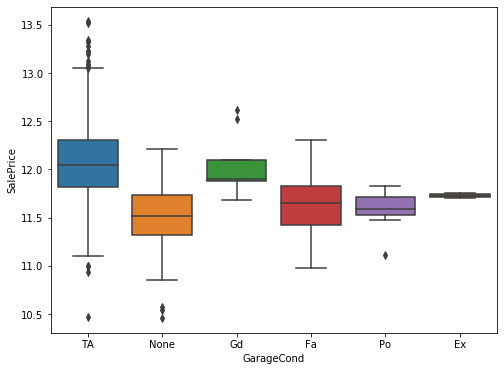

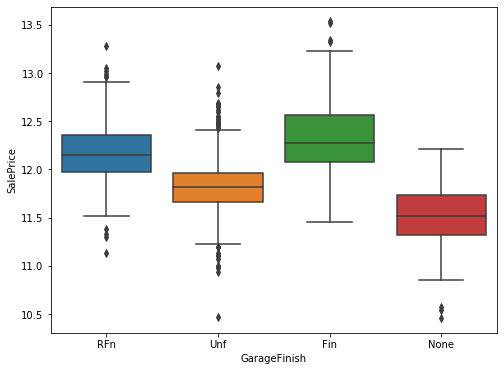

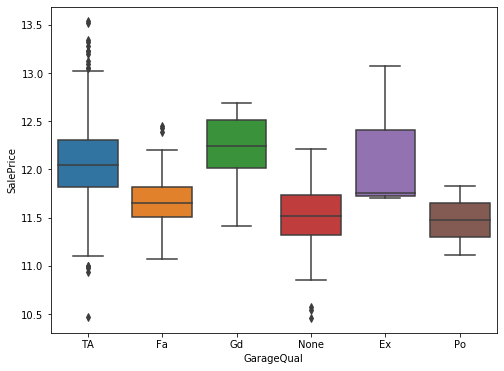

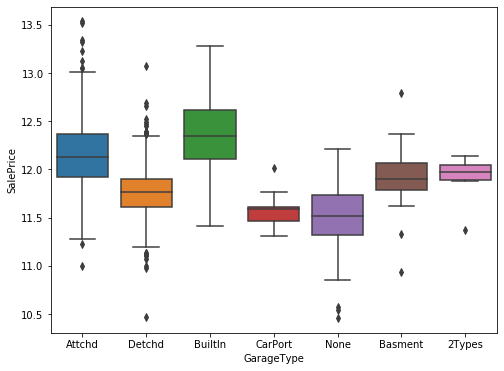

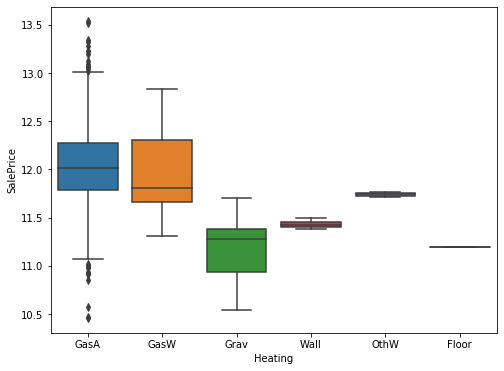

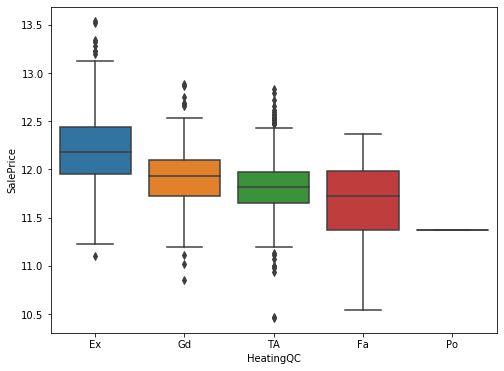

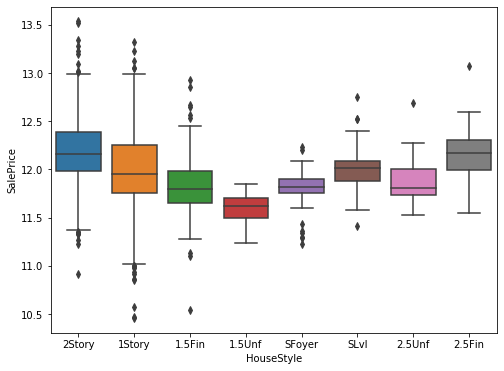

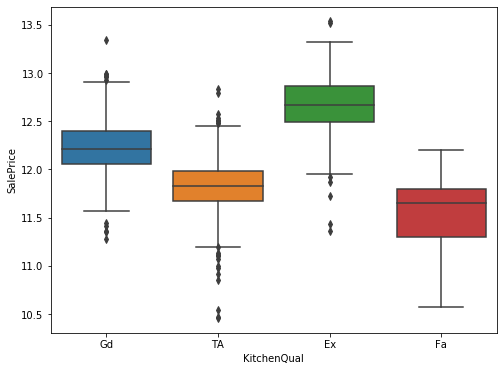

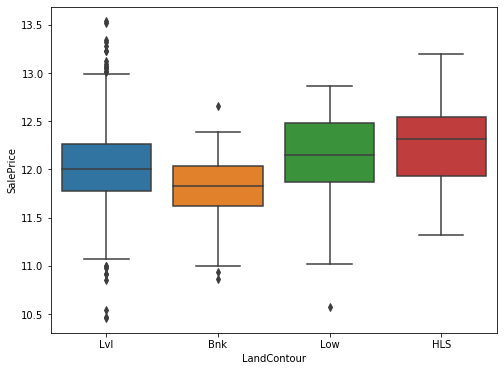

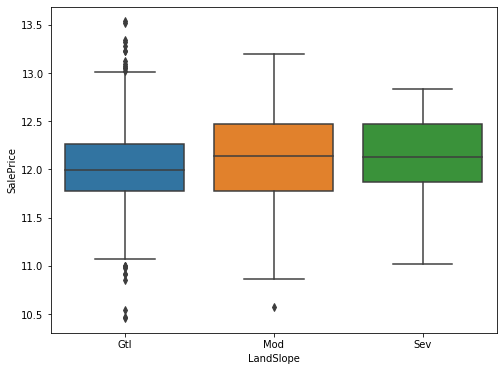

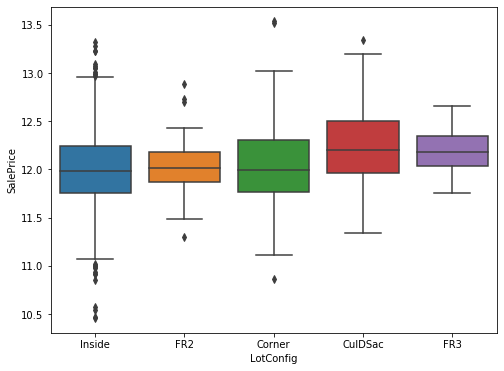

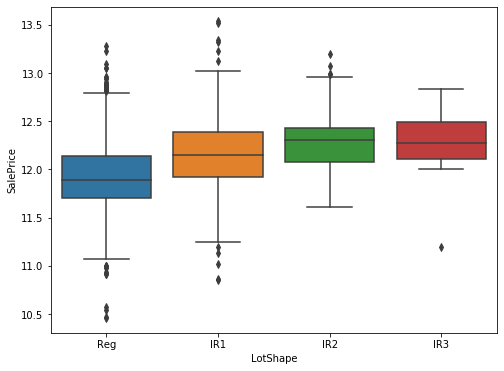

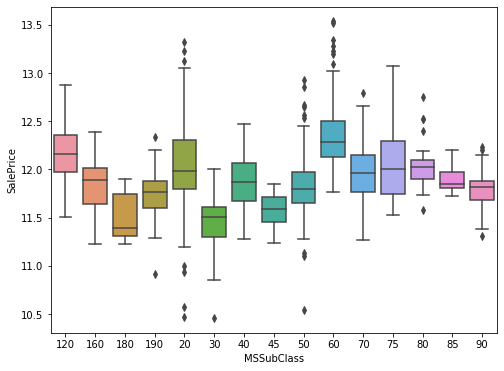

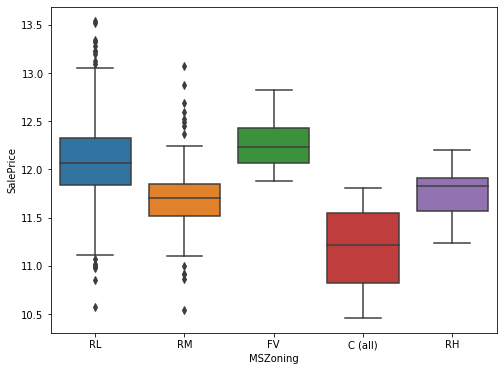

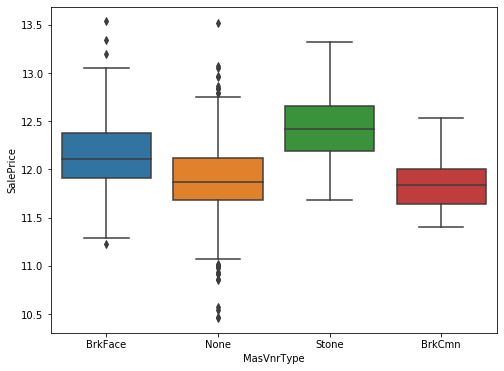

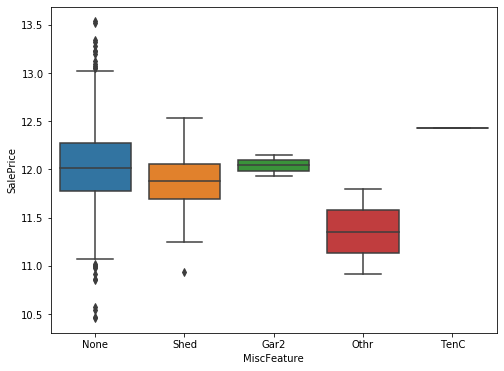

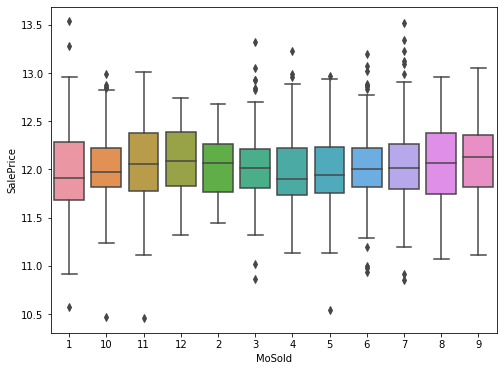

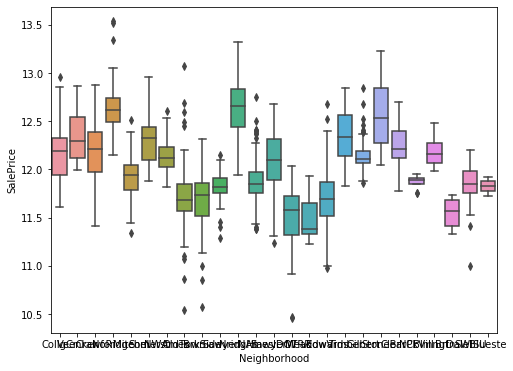

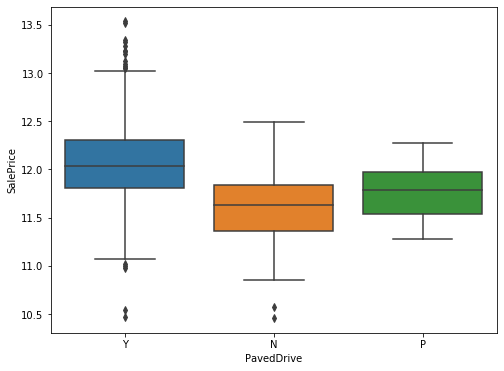

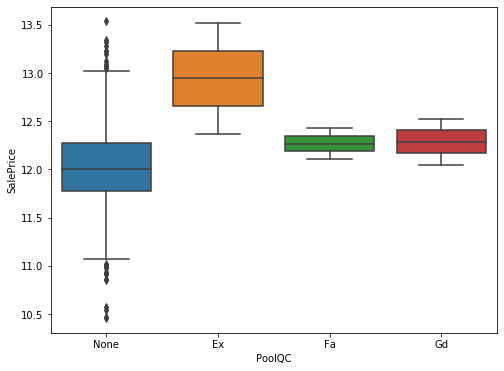

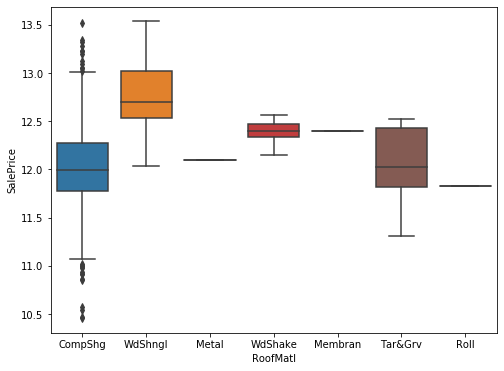

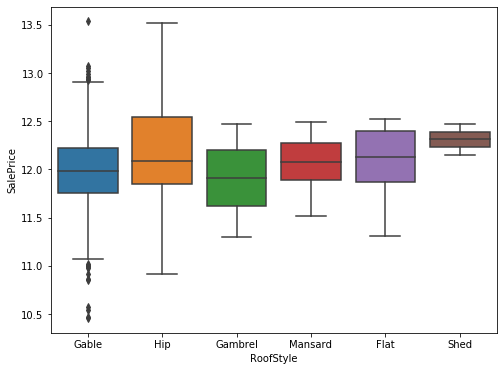

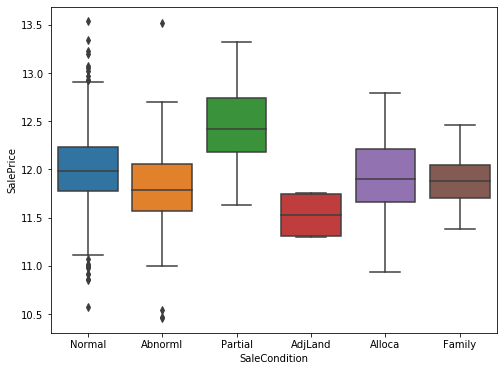

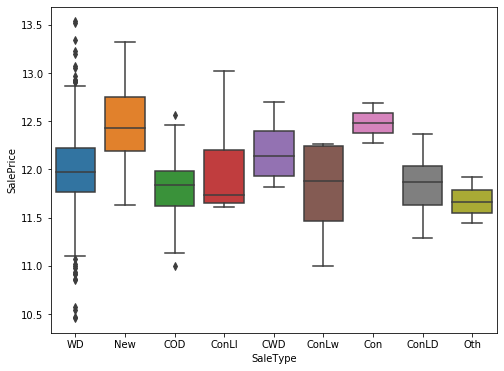

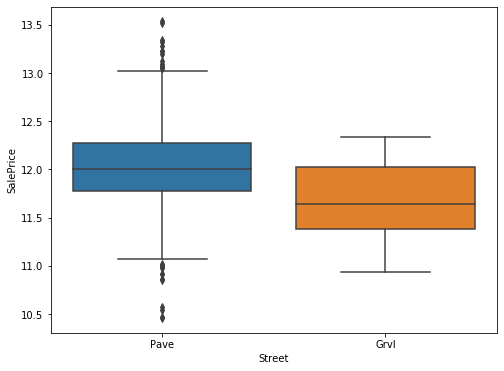

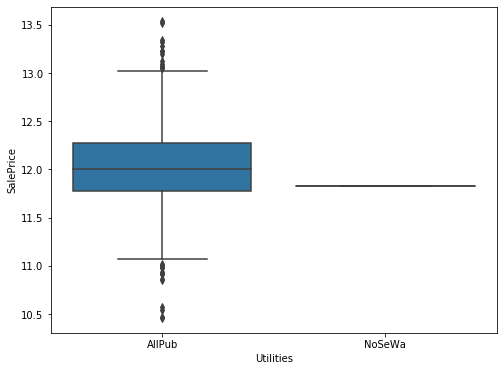

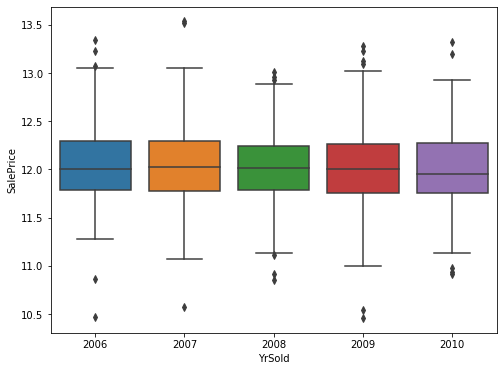

In [30]:

# vars_box = ['OverallQual','YearBuilt','BedroomAbvGr']
vars_box = feat_cat
for var in vars_box:
    data = pd.concat([train['SalePrice'], train[var]], axis=1)
    f, ax = plt.subplots(figsize=(8, 6))
    fig = sns.boxplot(x=var, y="SalePrice", data=data)

### 7.2 Comparing data to sale price through correlation matrix

Numerical values correlation matrix, to locate dependencies between different variables. 

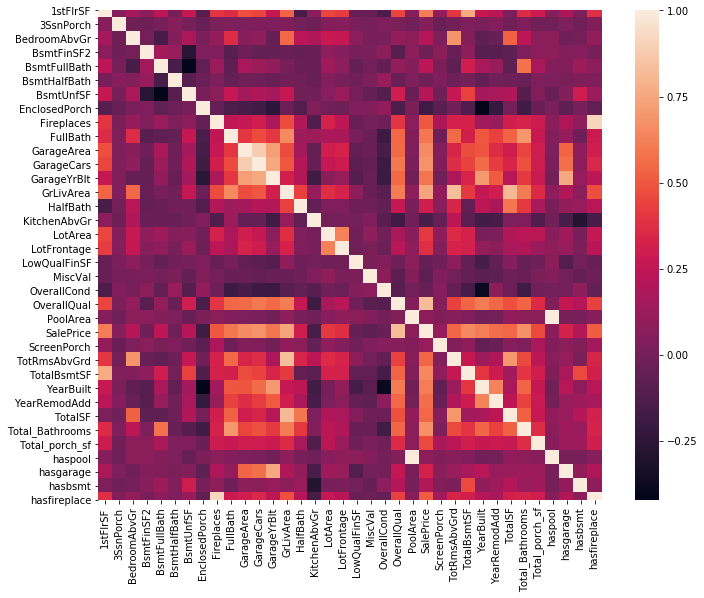

In [31]:
# Complete numerical correlation matrix
corrmat = train.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=1, square=True);

#### Largest correlation with Sale Price
Its important to remmber that this are 2D correlations, between sale price and another variable. When stacking all of the parameters the dependencies the picture gets more complex.

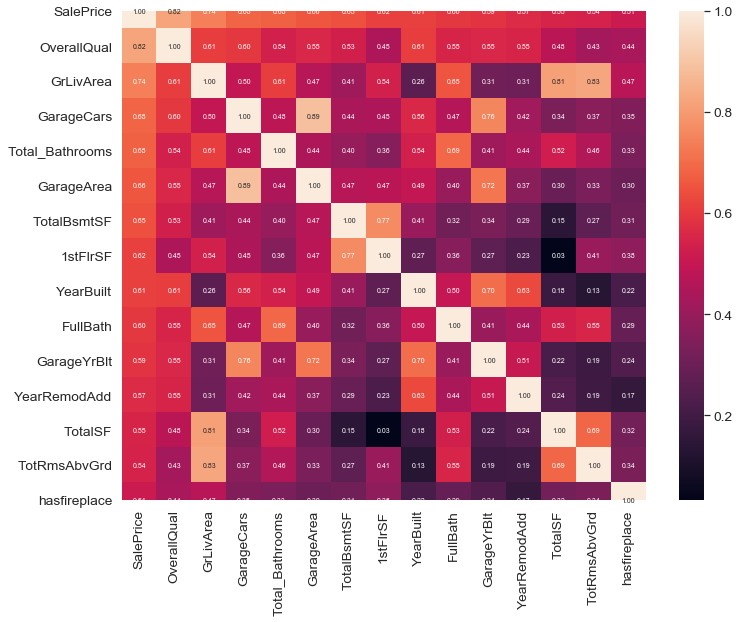

In [32]:
# saleprice correlation matrix
corr_num = 15 #number of variables for heatmap
cols_corr = corrmat.nlargest(corr_num, 'SalePrice')['SalePrice'].index
corr_mat_sales = np.corrcoef(train[cols_corr].values.T)
sns.set(font_scale=1.25)
f, ax = plt.subplots(figsize=(12, 9))
hm = sns.heatmap(corr_mat_sales, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 7}, yticklabels=cols_corr.values, xticklabels=cols_corr.values)
plt.show()

### 7.3 Pairplot for the most intresting parameters

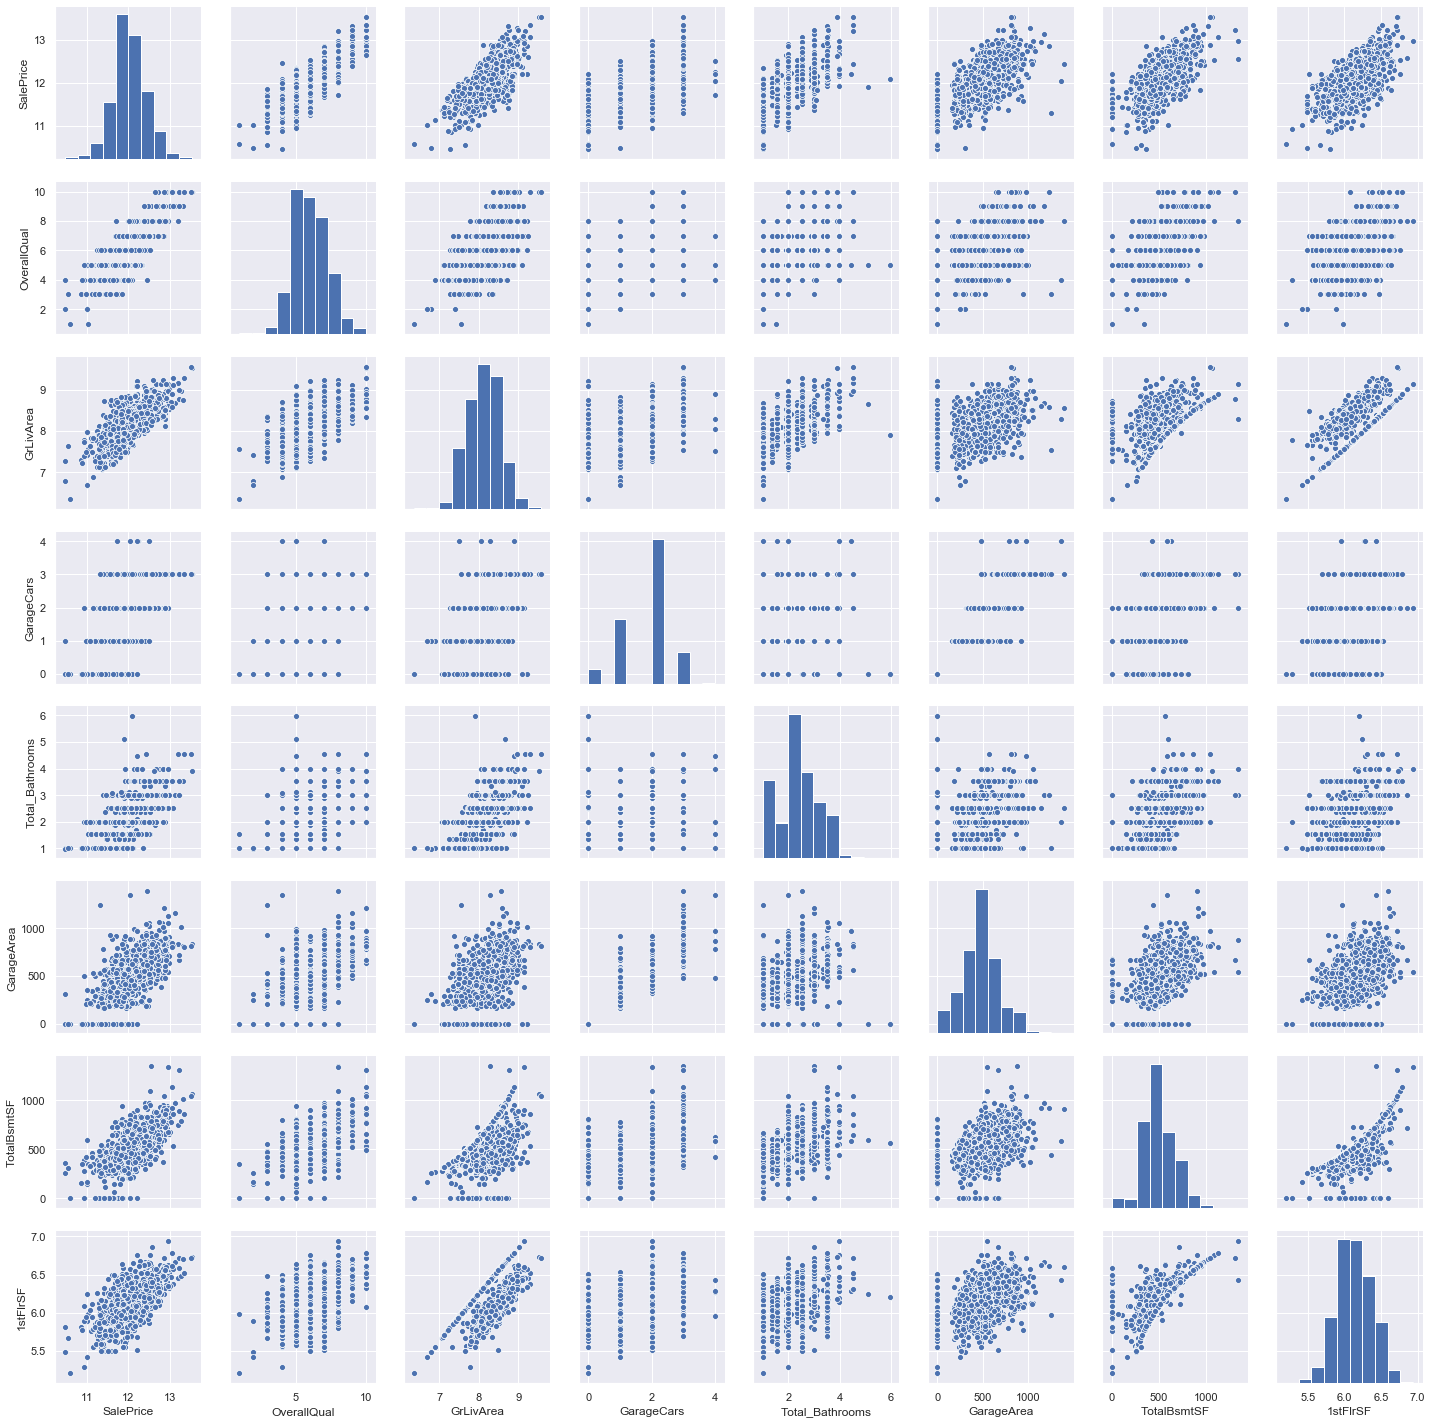

In [33]:
# pair plots for variables with largest correlation
var_num = 8
vars = cols_corr[0:var_num]
sns.set()
sns.pairplot(train[vars], size = 2.5)
plt.show();


## 8. Preparing the data 
Dropping Sale price, Creating dummy variable for the categorial variables and matching dimentions between train and test

In [34]:
data_features = data_features.drop("SalePrice", axis = 1)
final_features = pd.get_dummies(data_features)

print(final_features.shape)
X = final_features.iloc[:len(y), :]
X_test = final_features.iloc[len(y):, :]
X.shape, y_train.shape, X_test.shape


print(X.shape,y_train.shape,X_test.shape)


(2912, 334)
(1453, 334) (1453,) (1459, 334)


Removing overfit

In [35]:
# Removes colums where the threshold of zero's is (> 99.95), means has only zero values 
overfit = []
for i in X.columns:
    counts = X[i].value_counts()
    zeros = counts.iloc[0]
    if zeros / len(X) * 100 > 99.95:
        overfit.append(i)

overfit = list(overfit)
overfit.append('MSZoning_C (all)')

X = X.drop(overfit, axis=1).copy()
X_test = X_test.drop(overfit, axis=1).copy()

print(X.shape,y_train.shape,X_test.shape)


(1453, 331) (1453,) (1459, 331)


## 9. Creating the model

### 9.1 Importing learning libraries

In [36]:
from datetime import datetime
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import mean_squared_error , make_scorer
from sklearn.linear_model import ElasticNetCV, LassoCV, RidgeCV
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from mlxtend.regressor import StackingCVRegressor
from sklearn.linear_model import LinearRegression

from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

### 9.2 Defining folds and score functions

In [38]:
kfolds = KFold(n_splits=18, shuffle=True, random_state=42)

# model scoring and validation function
def cv_rmse(model, X=X):
    rmse = np.sqrt(-cross_val_score(model, X, y,scoring="neg_mean_squared_error",cv=kfolds))
    return (rmse)

# rmsle scoring function
def rmsle(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))

Mean Squared Error (MSE) <br>
Root Mean Squared Error (RMSE)<br>
Mean Absolute Error (MAE)<br>
R Squared (R²)<br>
Adjusted R Squared (R²)<br>
Mean Squared Percentage Error (MSPE)<br>
Mean Absolute Percentage Error (MAPE)<br>
Root Mean Squared Logarithmic Error (RMSLE)<br>

### 9.3 Defining models

In [40]:
lightgbm = LGBMRegressor(objective='regression', 
                                       num_leaves=4, #was 3
                                       learning_rate=0.01, 
                                       n_estimators=9000, #8000
                                       max_bin=200, 
                                       bagging_fraction=0.75,
                                       bagging_freq=5, 
                                       bagging_seed=7,
                                       feature_fraction=0.2, # 'was 0.2'
                                       feature_fraction_seed=7,
                                       verbose=-1,
                                       )

#xgboost = XGBRegressor(learning_rate=0.01,n_estimators=3460,
#                                      max_depth=3, min_child_weight=0,
#                                      gamma=0, subsample=0.7,
#                                      colsample_bytree=0.7,
#                                      objective='reg:linear', nthread=-1,
#                                      scale_pos_weight=1, seed=27,
#                                      reg_alpha=0.00006)



# setup models hyperparameters using a pipline
# The purpose of the pipeline is to assemble several steps that can be cross-validated together, while setting different parameters.
# This is a range of values that the model considers each time in runs a CV
e_alphas = [0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007]
e_l1ratio = [0.8, 0.85, 0.9, 0.95, 0.99, 1]
alphas_alt = [14.5, 14.6, 14.7, 14.8, 14.9, 15, 15.1, 15.2, 15.3, 15.4, 15.5]
alphas2 = [5e-05, 0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007, 0.0008]




# Kernel Ridge Regression : made robust to outliers
ridge = make_pipeline(RobustScaler(), RidgeCV(alphas=alphas_alt, cv=kfolds))

# LASSO Regression : made robust to outliers
lasso = make_pipeline(RobustScaler(), LassoCV(max_iter=1e7, 
                    alphas=alphas2,random_state=42, cv=kfolds))

# Elastic Net Regression : made robust to outliers
elasticnet = make_pipeline(RobustScaler(), ElasticNetCV(max_iter=1e7, 
                         alphas=e_alphas, cv=kfolds, l1_ratio=e_l1ratio))


stack_gen = StackingCVRegressor(regressors=(ridge, lasso, elasticnet, lightgbm),
                                meta_regressor=elasticnet,
                                use_features_in_secondary=True)


svr = make_pipeline(RobustScaler(), SVR(C= 20, epsilon= 0.008, gamma=0.0003))

# store models, scores and prediction values 
models = {'Ridge': ridge,
          'Lasso': lasso, 
          'ElasticNet': elasticnet,
          'lightgbm': lightgbm,
          'Svd': svr}
#           'xgboost': xgboost}
predictions = {}
scores = {}

### 9.4 Training the models

In [41]:
for name, model in models.items():
    
    model.fit(X, y)
    predictions[name] = np.expm1(model.predict(X))
    
    score = cv_rmse(model, X=X)
    scores[name] = (score.mean(), score.std())

### 9.5 Validating and training each model

In [42]:
# get the performance of each model on training data(validation set)
print('---- Score with CV_RMSLE-----')
score = cv_rmse(ridge)
print("Ridge score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

score = cv_rmse(lasso)
print("Lasso score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

score = cv_rmse(elasticnet)
print("ElasticNet score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

score = cv_rmse(lightgbm)
print("lightgbm score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

score = cv_rmse(svr)
print("SVR: {:.4f} ({:.4f})".format(score.mean(), score.std()))
# scores['svr'] = (score.mean(), score.std())

# score = cv_rmse(xgboost)
# print("xgboost score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))


#Fit the training data X, y
print('----START Fit----',datetime.now())
print('Elasticnet')
elastic_model = elasticnet.fit(X, y)
print('Lasso')
lasso_model = lasso.fit(X, y)
print('Ridge')
ridge_model = ridge.fit(X, y)
print('lightgbm')
lgb_model_full_data = lightgbm.fit(X, y)
print('Svr')
svr_model_full_data = svr.fit(X, y)

# print('xgboost')
# xgb_model_full_data = xgboost.fit(X, y)


print('stack_gen')
stack_gen_model = stack_gen.fit(np.array(X), np.array(y))


---- Score with CV_RMSLE-----
Ridge score: 0.1017 (0.0164)

Lasso score: 0.1016 (0.0176)

ElasticNet score: 0.1016 (0.0176)

lightgbm score: 0.1046 (0.0178)

SVR: 0.1015 (0.0170)
----START Fit---- 2020-01-01 23:15:58.767682
Elasticnet
Lasso
Ridge
lightgbm
Svr
stack_gen


### 9.6 Blend model prediction

In [ ]:
def blend_models_predict(X):
    return ((0.16  * elastic_model.predict(X)) + \
            (0.16 * lasso_model.predict(X)) + \
            (0.11 * ridge_model.predict(X)) + \
            (0.2 * lgb_model_full_data.predict(X)) + \
            (0.1 * svr_model_full_data.predict(X)) + \
#             (0.1 * xgb_model_full_data.predict(X)) + \
            (0.27 * stack_gen_model.predict(np.array(X))))

In [ ]:
print('RMSLE score on train data:')
print(rmsle(y, blend_models_predict(X)))

## 10 Submission

In [ ]:
print('Predict submission')
submission = pd.read_csv("../input/sample_submission.csv")
submission.iloc[:,1] = (np.expm1(blend_models_predict(X_test)))

In [ ]:
# q1 = submission['SalePrice'].quantile(0.0042)
# q2 = submission['SalePrice'].quantile(0.99)
# # Quantiles helping us get some extreme values for extremely low or high values 
# submission['SalePrice'] = submission['SalePrice'].apply(lambda x: x if x > q1 else x*0.77)
# submission['SalePrice'] = submission['SalePrice'].apply(lambda x: x if x < q2 else x*1.1)
submission.to_csv("submission.csv", index=False)